### **Q1. Model the game of Snakes and Ladders (single-player game) as a Markov Process. Write out it’s state space and structure of transition probabilities.**

State space $S$ are a set of integer k, where $1 \leq k \leq N_{stop}$ and k is not the start of a ladder of snake. It is due to the start of ladder or snake will never be the start or end of a step.

Here we define two dictionaries ladder and snake in the data class SL_rules, where (key,value) pair are starts and ends of ladder or snake.

Transition probability can be calculated in a recursive way. From any start point $k \in S$, we roll a dice. For result in [1,5], we have the probability of $k + roll result$ of $dic[k+roll result]$ if there is a ladder or snake here is $1/6$.
In the cases we get a $6$, we change the start point to $k+6$ or $dic[k+6]$ and repeat the process above. The recursive function stops when the player pass the stop position.





### **Q2. Create a transition map**
Define SL_state to record the position of the player. SL_Rules to record the stop position and positions of snakes and ladders

In [1]:
from rl import markov_process, distribution
from typing import (Dict, Iterable, Generic, Sequence, Tuple,
                    Mapping, Optional, TypeVar)
from dataclasses import dataclass
from rl.distribution import Categorical
import matplotlib.pyplot as plt

@dataclass(frozen=True)
class SL_State:
    position: int

@dataclass(frozen=True)
class SL_Rules:
    stopstate: int
    snake: Dict[int,int]
    ladder: Dict[int,int]

class SL_MDP(markov_process.FiniteMarkovProcess[SL_State]):

    def __init__(self, sl_rule: SL_Rules):
        self.sl_rule = sl_rule
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> markov_process.Transition[SL_State]:
        d: Dict[SL_State, Categorical[SL_State]] = {}
        n = self.sl_rule.stopstate
        d[SL_State(n)] = None
        def roll_dice(k,temp_dict,pre_prob):
            for roll_result in range(1,6):
                if k + roll_result >= n:
                    temp_dict[SL_State(n)] = pre_prob*(7-roll_result)/6
                    return
                if k + roll_result in self.sl_rule.snake.keys():
                    temp_dict[SL_State(self.sl_rule.snake[k+roll_result])] = pre_prob*1/6
                elif k + roll_result in self.sl_rule.ladder.keys():
                    temp_dict[SL_State(self.sl_rule.ladder[k+roll_result])] = pre_prob*1/6
                else:
                    temp_dict[SL_State(k+roll_result)] = pre_prob*1/6
            roll_result = 6
            if k + roll_result >= n:
                temp_dict[SL_State(n)] = (7-roll_result)/6
                return
            if k + roll_result in self.sl_rule.snake.keys():
                roll_dice(self.sl_rule.snake[k+roll_result],temp_dict,pre_prob=1/6)

            elif k + roll_result in self.sl_rule.ladder.keys():
                roll_dice(self.sl_rule.ladder[k+roll_result],temp_dict,pre_prob=1/6)
            else:
                roll_dice(k+roll_result,temp_dict,pre_prob=1/6)




        for k in range(1,n):
            if (k not in self.sl_rule.snake.keys()) and (k not in self.sl_rule.ladder.keys()):
                print(k)
                temp_dict = {}
                roll_dice(k,temp_dict,1)
                d[SL_State(k)] = Categorical(temp_dict)

        return d

Show the MDP for a simple case with stop position = 8.

In [2]:
#sl_rules = SL_Rules(stopstate=10, snake={5:3},
#                    ladder = {2:4})
#mdp = SL_MDP(sl_rules)
#mdp

Calculate an example from https://piazza.com/class/kjgrmumjhtc3br?cid=17.

1
2
4
5
6
8
9
10
11
13
14
15
16
17
18
19
21
22
23
24
26
27
29
30
32
33
34
35
36
37
39
40
41
42
43
44
46
47
48
50
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
68
70
71
72
73
74
75
76
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
<class 'rl.distribution.Categorical'>
<class 'rl.distribution.Categorical'>


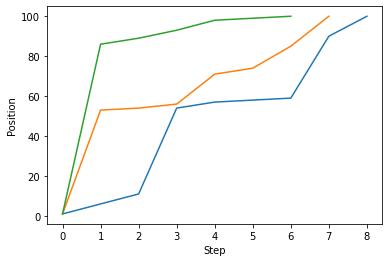

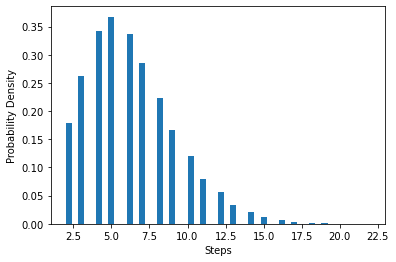

In [3]:
sl_rules = SL_Rules(stopstate=100, snake ={38:1,31:6,49:8},
                    ladder = {3:39,7:48,12:51,20:41,25:57,28:35,45:74,60:85,67:90,69:92,77:83})
mdp = SL_MDP(sl_rules)
start_distr = Categorical({SL_State(1): 1})
print(type(start_distr))
plt.figure()
for i, trace in enumerate(mdp.traces(start_distr)):
    traj = []
    for _,x in enumerate(trace):
        traj += [x.position]
    plt.plot(traj)
    if i > 1:
        break
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

start_distr = Categorical({SL_State(1): 1})
print(type(start_distr))
timesteps =[]
for i,trace in enumerate(mdp.traces(start_distr)):
    timesteps += [sum(1 for _ in trace)]
    if i > 50000:
        break

plt.hist(timesteps,bins = 50,density=True)
plt.xlabel('Steps')
plt.ylabel('Probability Density')
plt.show()

In [1]:
sl_rules = SL_Rules(stopstate=100, snake ={38:1,31:6,49:8,53:17,65:14,76:37,70:34,94:42,88:50,98:54,82:63},
                    ladder = {3:39,7:48,12:51,20:41,25:57,28:35,45:74,60:85,67:90,69:92,77:83})
mdp = SL_MDP(sl_rules)

NameError: name 'SL_Rules' is not defined

Show three traces

In [1]:
start_distr = Categorical({SL_State(1): 1})
print(type(start_distr))
plt.figure()
for i, trace in enumerate(mdp.traces(start_distr)):
    traj = []
    for _,x in enumerate(trace):
        traj += [x.position]
    plt.plot(traj)
    if i > 1:
        break
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

NameError: name 'Categorical' is not defined

Calculate the distribution of time steps to finish the game

In [2]:
start_distr = Categorical({SL_State(1): 1})
print(type(start_distr))
timesteps =[]
for i,trace in enumerate(mdp.traces(start_distr)):
    timesteps += [sum(1 for _ in trace)]
    if i > 10000:
        break

plt.hist(timesteps,bins = 50,density=True)
plt.xlabel('Steps')
plt.ylabel('Probability Density')
plt.show()

NameError: name 'Categorical' is not defined